In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/occupancy.csv')
df.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:00,23.7000,26.2720,585.200000,749.200000,0.004764,1
1,2/2/2015 15:00,23.7180,26.2900,578.400000,760.400000,0.004773,1
2,2/2/2015 16:00,23.7300,26.2300,572.666667,769.666667,0.004765,1
3,2/2/2015 17:00,23.7225,26.1250,493.750000,774.750000,0.004744,1
4,2/2/2015 18:00,23.7540,26.2000,488.600000,779.000000,0.004767,1
5,2/2/2015 19:00,23.7600,26.2600,568.666667,790.000000,0.004779,1
6,2/2/2015 20:00,23.7300,26.2900,536.333333,798.000000,0.004776,1
7,2/2/2015 21:00,23.7540,26.2900,509.000000,797.000000,0.004783,1
8,2/2/2015 22:00,23.7540,26.3500,476.000000,803.200000,0.004794,1
9,2/2/2015 23:00,23.7360,26.3900,510.000000,809.000000,0.004796,1


In [4]:
df['date']

# all this is a string that contains a date measure, but python doesnt recognize yet that this is a date.
# declare this as a datetime object

0        2/2/2015 14:00
1        2/2/2015 15:00
2        2/2/2015 16:00
3        2/2/2015 17:00
4        2/2/2015 18:00
             ...       
2659     5/24/2015 9:00
2660    5/24/2015 10:00
2661    5/24/2015 11:00
2662    5/24/2015 12:00
2663    5/24/2015 13:00
Name: date, Length: 2664, dtype: object

### Declaring the date variable as a datetime object

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0      2015-02-02 14:00:00
1      2015-02-02 15:00:00
2      2015-02-02 16:00:00
3      2015-02-02 17:00:00
4      2015-02-02 18:00:00
               ...        
2659   2015-05-24 09:00:00
2660   2015-05-24 10:00:00
2661   2015-05-24 11:00:00
2662   2015-05-24 12:00:00
2663   2015-05-24 13:00:00
Name: date, Length: 2664, dtype: datetime64[ns]

In [6]:
# print(pd.to_datetime("4th of July, 2015"))
# print(pd.to_datetime("Nov 9 2001"))
# print(pd.to_datetime("February 2nd 2019 15:32"))

# note the different object formats that python is able to recognize as date-time and can change automatically with the pd.to_datetime command!
# If there is a date format python cant deal with automatically, we will need to use 
# REGEX to deal with it! 

2015-07-04 00:00:00
2001-11-09 00:00:00
2019-02-02 15:32:00


Formatting options for datetime objects: https://strftime.org/

In [8]:
pd.to_datetime("February 2nd 2019 15:32").strftime('%B')
pd.to_datetime("February 2nd 2019 15:32").strftime('%c')

# there is an internal calendar that is saved, and this internal calendar allows you to get the day of the week out of the object
# even without specifying that it is a Saturday!

# check out the .strftime method with python
# see all search items (eg %B, %c, etc): https://strftime.org/

'Sat Feb  2 15:32:00 2019'

### Setting a time index

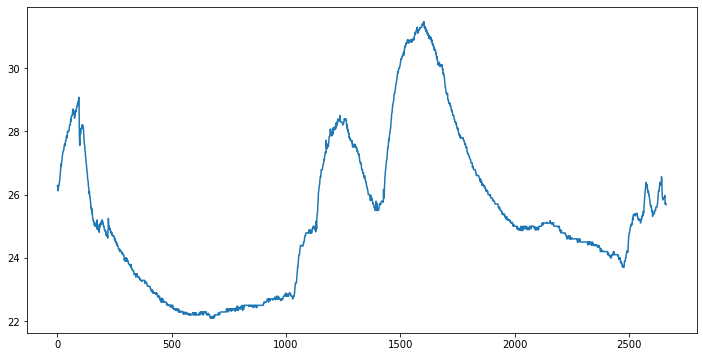

In [107]:
# Without the date index
# resizing all of the plots: 
# plt.rcParams['figure.figsize'] = (12, 6)
plt.plot(df['Humidity'])

In [9]:
df.index = pd.DatetimeIndex(df['date'], freq='H')
df.index

# here we are setting the date col as the index (after having reformatted it!) and setting the frequency to HOURS!

DatetimeIndex(['2015-02-02 14:00:00', '2015-02-02 15:00:00',
               '2015-02-02 16:00:00', '2015-02-02 17:00:00',
               '2015-02-02 18:00:00', '2015-02-02 19:00:00',
               '2015-02-02 20:00:00', '2015-02-02 21:00:00',
               '2015-02-02 22:00:00', '2015-02-02 23:00:00',
               ...
               '2015-05-24 04:00:00', '2015-05-24 05:00:00',
               '2015-05-24 06:00:00', '2015-05-24 07:00:00',
               '2015-05-24 08:00:00', '2015-05-24 09:00:00',
               '2015-05-24 10:00:00', '2015-05-24 11:00:00',
               '2015-05-24 12:00:00', '2015-05-24 13:00:00'],
              dtype='datetime64[ns]', name='date', length=2664, freq='H')

In [10]:
df.head()
# make sure this time-index with hourly frequency worked
# you have declared this df as having time series data.

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,,
2015-02-02 14:00:00,2015-02-02 14:00:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 15:00:00,2015-02-02 15:00:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 16:00:00,2015-02-02 16:00:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 17:00:00,2015-02-02 17:00:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 18:00:00,2015-02-02 18:00:00,23.7540,26.200,488.600000,779.000000,0.004767,1


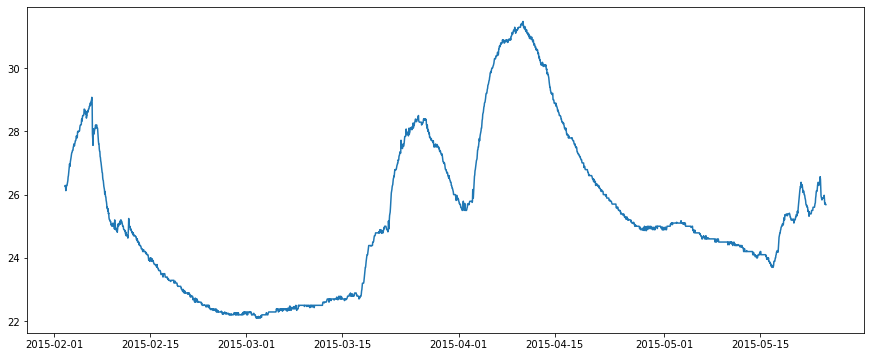

In [14]:
plt.plot(df['Humidity'])
# now it will automatically re-plot this on the time-index
plt.rcParams['figure.figsize']=(15,6)

### Changing the frequency of the data (Resampling)

In [17]:
df['Humidity'].resample('W').mean()

# kind of similar to a groupby, but for time series. 
# instead of hourly data, what if you want to see the avg temperature for each week. 
# use the resample method!

date
2015-02-08    27.529601
2015-02-15    24.591775
2015-02-22    23.049012
2015-03-01    22.288259
2015-03-08    22.308055
2015-03-15    22.601635
2015-03-22    24.315943
2015-03-29    27.812716
2015-04-05    26.966913
2015-04-12    30.874330
2015-04-19    28.281236
2015-04-26    25.749650
2015-05-03    24.996242
2015-05-10    24.668289
2015-05-17    24.174230
2015-05-24    25.638685
Freq: W-SUN, Name: Humidity, dtype: float64

In [16]:
# help(df.resample)

Options for resampling frequency:
    
- B       business day frequency
- C       custom business day frequency (experimental)
- D       calendar day frequency
- W       weekly frequency
- M       month end frequency
- SM      semi-month end frequency (15th and end of month)
- Q       quarter end frequency
- A       year end frequency
- H       hourly frequency
- T       minutely frequency
- S       secondly frequency
- L       milliseonds
- U       microseconds
- N       nanoseconds
- and more!

In [112]:
df['Humidity'].resample('M').mean()

date
2015-02-28    24.374582
2015-03-31    24.325819
2015-04-30    27.677441
2015-05-31    24.842351
Freq: M, Name: Humidity, dtype: float64

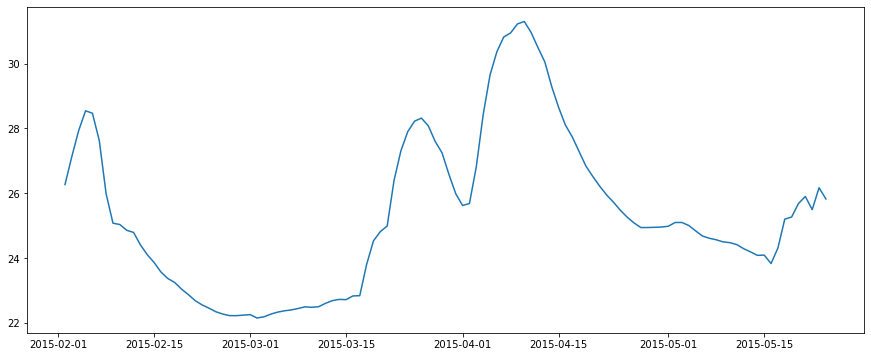

In [18]:
plt.plot(df['Humidity'].resample('D').mean())
# maybe you want to plot the data when you have fewer points (because of resampling!)

## First Differencing your data

In [20]:
df['Humidity_diff'] = df['Humidity'].diff()
print(df)
# df.dropna(inplace = True) # use this to drop the first row of data since it automatically gives you the benchmark as a NaN when using the differencing method.

# calculate the change from one point in time to the next point in time!
# Will give you the change from one value to the next. Also called first differenc
# The differencing function will work on the frequency that you've set! Meaning the difference from one day to the next, given a daily frequency

                                   date  Temperature   Humidity       Light  \
date                                                                          
2015-02-02 14:00:00 2015-02-02 14:00:00    23.700000  26.272000  585.200000   
2015-02-02 15:00:00 2015-02-02 15:00:00    23.718000  26.290000  578.400000   
2015-02-02 16:00:00 2015-02-02 16:00:00    23.730000  26.230000  572.666667   
2015-02-02 17:00:00 2015-02-02 17:00:00    23.722500  26.125000  493.750000   
2015-02-02 18:00:00 2015-02-02 18:00:00    23.754000  26.200000  488.600000   
...                                 ...          ...        ...         ...   
2015-05-24 09:00:00 2015-05-24 09:00:00    24.290000  25.700000  808.000000   
2015-05-24 10:00:00 2015-05-24 10:00:00    24.330000  25.736000  809.800000   
2015-05-24 11:00:00 2015-05-24 11:00:00    24.330000  25.700000  817.000000   
2015-05-24 12:00:00 2015-05-24 12:00:00    24.356667  25.700000  813.000000   
2015-05-24 13:00:00 2015-05-24 13:00:00    24.408333

## Decomposing Time Series data

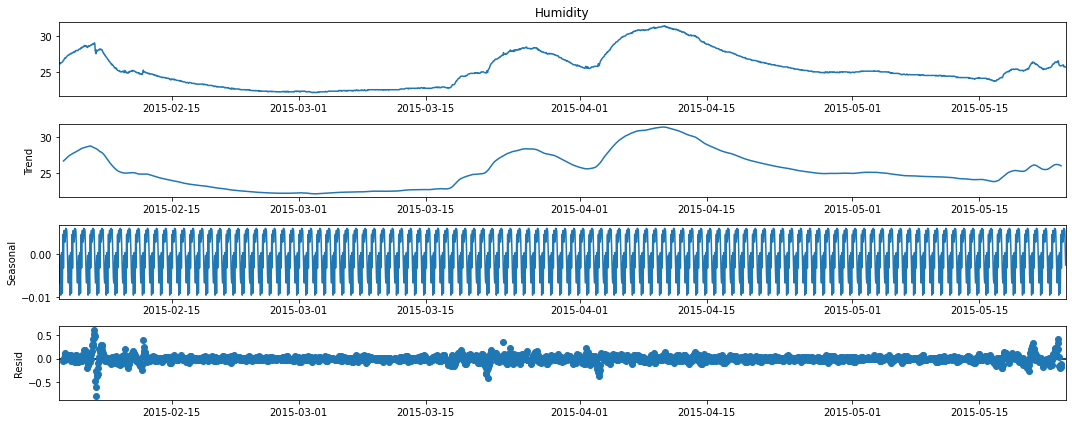

In [28]:
dec = sm.tsa.seasonal_decompose(df['Humidity'])
# Meaning, does this time series have different components? e.g. Trend? Seasonal? 

dec.plot()
plt.show()

# notice how the scale of these 3 components changes! 
# residual movements cannot be interpreted as relating either to the trend or seasonal components
# notice the tiny downward spike in teh graph, that is neither in the trend or seasonal, but which are reflected in the residual component!!

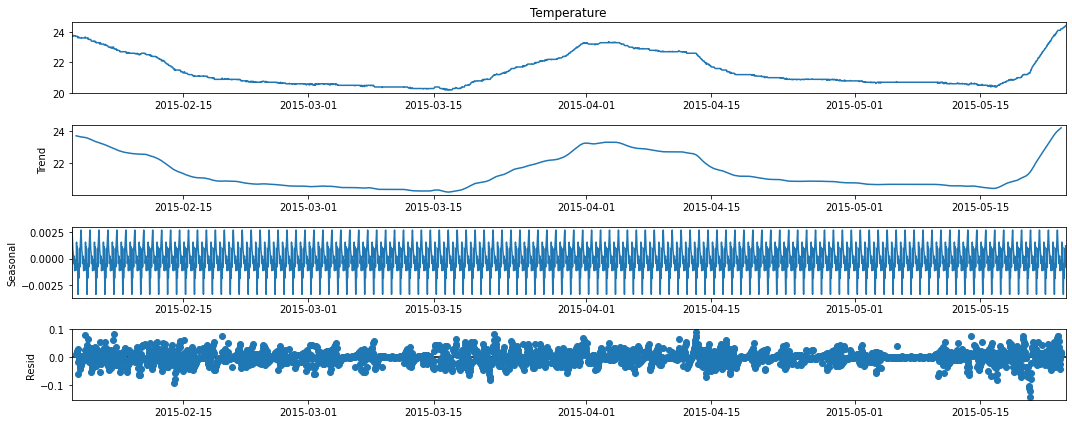

In [35]:
dec = sm.tsa.seasonal_decompose(df['Temperature'])  
# tsa = time series analysis

dec.plot()
plt.show()
# see how temperature varies from humidity for example in this seasonal decompose method

## Checking for autocorrelation

In [30]:
df['Humidity'].autocorr()

#default is t and t-1. 
# BUT you can also specify the lag within the parenthesis. Default is lag 1
# lag1: t and t-1
# lag 2: t and t-2
# your lag length is the frequency you specified when you set your time index!! 

0.9997365675086253

In [31]:
df['Light'].autocorr()

0.9947236339033859

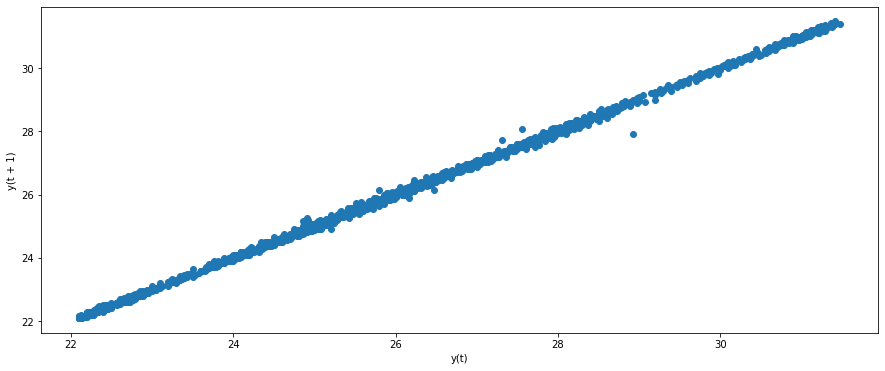

In [32]:
from pandas.plotting import lag_plot
lag_plot(df['Humidity'])

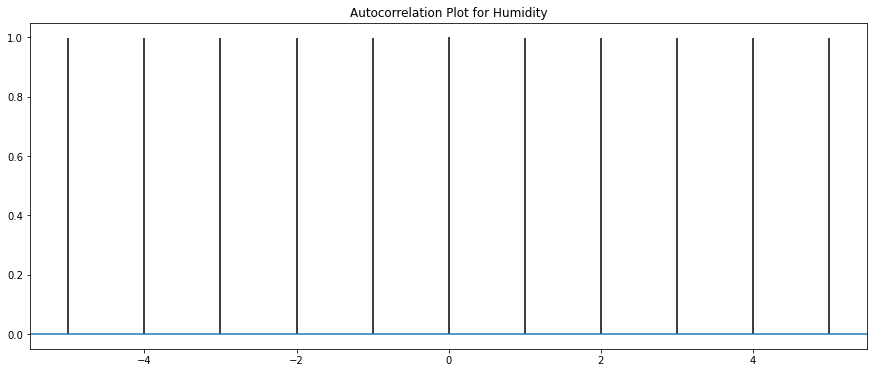

In [33]:
# Autocorrelation Plot (part of the matplotlib package. Just need to give the variable and specify the lag)

plt.acorr(df['Humidity'], maxlags = 5)
plt.title("Autocorrelation Plot for Humidity")

  
plt.show()  

# autocorrelation at lag 0 will ALWAYS be 1 (because it is the corr of t and t). 

In [34]:
# If a variable has a very high autocorrelation, it means it is very easy to PREDICT, or to FORECAST!

# in regression for example, first we started with correlation and then made a model for explainability. 
# Similar in time series, we will start with autocorrelation and then go on to the next step! (Autoregression)

## Applying Time Series models

In [36]:
from statsmodels.tsa.ar_model import AutoReg
# AR(1), lags = 1
# AR(2), lags = 2

model = AutoReg(df['Humidity'], lags = 1).fit()  # defining your variable y, and the length of lags. 
model.summary()

# interpretation: the z score is huge, the pval is very small, and the confidence interval shows the value being extremely close to 1.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                     AutoReg(1)   Log Likelihood                3900.599
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Tue, 24 Nov 2020   AIC                             -5.765
Time:                        21:17:38   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.763
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0070      0.011      0.622      0.534      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.761      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [119]:
help(AutoReg)

Help on class AutoReg in module statsmodels.tsa.ar_model:

class AutoReg(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  AutoReg(endog, lags, trend='c', seasonal=False, exog=None, hold_back=None, period=None, missing='none')
 |  
 |  Autoregressive AR-X(p) model.
 |  
 |  Estimate an AR-X model using Conditional Maximum Likelihood (OLS).
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The independent variable.
 |  lags : {int, list[int]}
 |      The number of lags to include in the model if an integer or the
 |      list of lag indices to include.  For example, [1, 4] will only
 |      include lags 1 and 4 while lags=4 will include lags 1, 2, 3, and 4.
 |  trend : {'n', 'c', 't', 'ct'}
 |      The trend to include in the model:
 |  
 |      * 'n' - No trend.
 |      * 'c' - Constant only.
 |      * 't' - Time trend only.
 |      * 'ct' - Constant and time trend.
 |  
 |  seasonal : bool
 |      Flag indicating whether to include

In [37]:
model = AutoReg(df['Humidity'], lags = 3).fit()  # defining your variable y, and the length of lags. 
model.summary()

# look at how changing the length of lags changes the summary.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                     AutoReg(3)   Log Likelihood                3916.083
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Tue, 24 Nov 2020   AIC                             -5.777
Time:                        21:19:36   BIC                             -5.766
Sample:                    02-02-2015   HQIC                            -5.773
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0078      0.011      0.695      0.487      -0.014       0.030
Humidity.L1     1.0087      0.019     52.408      0.000       0.971       1.046
Humidity.L2     0.1090      0.027      3.985      0.000       0.055       0.163
Humidity.L3    -0.1180      0.019     -6.130      0.000      -0.156      -0.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0004           +0.0000j            1.0004            0.0000
AR.2           -2.9494           +0.0000j            2.9494            0.5000
AR.3            2.8729           +0.0000j            2.8729            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
model = AutoReg(df['Humidity'], lags = 10).fit()  # defining your variable y, and the length of lags. 
model.summary()

# if you move far enough into the future, the lags become INSIGNIFICANT! Because the value of today may not be so important for the value 10 days for now. 
# After a certain lag length, they typically are all insignificant. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                    AutoReg(10)   Log Likelihood                3999.381
Method:               Conditional MLE   S.D. of innovations              0.054
Date:                Tue, 24 Nov 2020   AIC                             -5.843
Time:                        21:19:55   BIC                             -5.816
Sample:                    02-03-2015   HQIC                            -5.833
                         - 05-24-2015                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0142      0.011      1.306      0.192      -0.007       0.036
Humidity.L1      0.9394      0.019     48.459      0.000       0.901       0.977
Humidity.L2      0.1152      0.027      4.328      0.000       0.063       0.167
Humidity.L3     -0.0306      0.027     -1.147      0.251      -0.083       0.022
Humidity.L4      0.0994      0.027      3.722      0.000       0.047       0.152
Humidity.L5      0.0086      0.027      0.319      0.750      -0.044       0.061
Humidity.L6     -0.0340      0.027     -1.270      0.204      -0.087       0.018
Humidity.L7     -0.0148      0.027     -0.552      0.581      -0.067       0.038
Humidity.L8     -0.0333      0.027     -1.247      0.213      -0.086       0.019
Humidity.L9   1.043e-05      0.027      0.000      1.000      -0.052       0.052
Humidity.L10    -0.0503      0.019     -2.592      0.010      -0.088      -0.012
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0013           -0.0000j            1.0013           -0.0000
AR.2             1.1004           -0.0000j            1.1004           -0.0000
AR.3             0.8997           -1.0775j            1.4037           -0.1393
AR.4             0.8997           +1.0775j            1.4037            0.1393
AR.5            -1.3283           -0.4564j            1.4045           -0.4473
AR.6            -1.3283           +0.4564j            1.4045            0.4473
AR.7            -0.7991           -1.2736j            1.5035           -0.3392
AR.8            -0.7991           +1.2736j            1.5035            0.3392
AR.9             0.1770           -1.4220j            1.4330           -0.2303
AR.10            0.1770           +1.4220j            1.4330            0.2303
------------------------------------------------------------------------------
"""

## Making Predictions

In order to assess the accuracy of our predictions, we will remove the last ten observations from the variable which we are using to train the model. Afterwards, we will then predict those ten observations, and see how close we got with our model to what happened in reality!

In [39]:
(train, test) = df.Humidity[:-10], df.Humidity[-10:]
# train the model on all observations EXCEPT the last 10!
# pretend that the last 10 days didnt happen, and predict them using your model to see how well the model performs. 


model = AutoReg(df['Humidity'], lags = 1).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2664
Model:                     AutoReg(1)   Log Likelihood                3900.599
Method:               Conditional MLE   S.D. of innovations              0.056
Date:                Tue, 24 Nov 2020   AIC                             -5.765
Time:                        21:26:08   BIC                             -5.758
Sample:                    02-02-2015   HQIC                            -5.763
                         - 05-24-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0070      0.011      0.622      0.534      -0.015       0.029
Humidity.L1     0.9997      0.000   2247.761      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
model.predict(start=len(train), end=len(train)+10)
# predict ten periods into the future! Starting at train (see last step)
# pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

2015-05-24 04:00:00    25.889624
2015-05-24 05:00:00    25.889624
2015-05-24 06:00:00    25.911618
2015-05-24 07:00:00    25.891291
2015-05-24 08:00:00    25.977599
2015-05-24 09:00:00    25.851635
2015-05-24 10:00:00    25.699679
2015-05-24 11:00:00    25.735668
2015-05-24 12:00:00    25.699679
2015-05-24 13:00:00    25.699679
2015-05-24 14:00:00    25.681351
Freq: H, dtype: float64

In [43]:
train.tail()
# see where your training set ends
# predict: Y hat = beta_0 + beta_1 Y t-1 + beta_2 Y t-2

date
2015-05-23 23:00:00    25.832000
2015-05-24 00:00:00    25.840000
2015-05-24 01:00:00    25.891667
2015-05-24 02:00:00    25.890000
2015-05-24 03:00:00    25.890000
Freq: H, Name: Humidity, dtype: float64

### Dickey Fuller Test for Stationarity

In [122]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)
adfuller(df.Humidity)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

(-2.1559012689082246,
 0.22263806835588407,
 23,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7943.569888410115)

In [123]:
# On First Differences

adfuller(df['Humidity_diff'][1:])

(-5.929156941803512,
 2.4035285690791973e-07,
 22,
 2639,
 {'1%': -3.432830360798943,
  '5%': -2.8626358355986774,
  '10%': -2.5673533514279425},
 -7936.868635028)

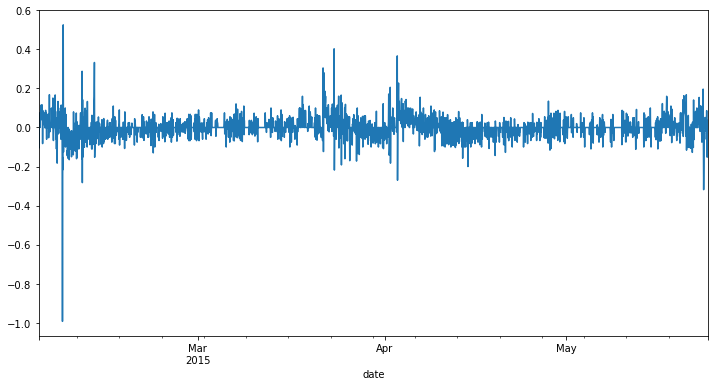

In [124]:
df['Humidity_diff'].plot()

## MA models

In [125]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(df['CO2'], order=(0, 1)).fit()
print(model.params)

const        717.839682
ma.L1.CO2      0.992392
dtype: float64


In [126]:
(train, test) = df.CO2[:-10], df.CO2[-10:]

model = ARMA(df['CO2'], order=(0, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

,Prediction,True Values
0,1153.250000,909.931414
1,1152.400000,959.307167
2,1146.166667,909.463518
3,1145.400000,952.742058
4,1140.800000,909.031935
5,1150.250000,947.844519
6,1129.200000,918.705317
7,1125.800000,926.732978
8,1123.000000,915.392256
9,1124.000000,923.868003


## ARMA Models

In [127]:
model = ARMA(df['CO2'], order=(2, 1)).fit()
pred = model.predict(start=len(train), end=len(train)+10)
pd.DataFrame(zip(test, pred), columns = {'True Values', 'Prediction'})

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


,Prediction,True Values
0,1153.250000,1153.107801
1,1152.400000,1153.828073
2,1146.166667,1152.855321
3,1145.400000,1146.188058
4,1140.800000,1145.342822
5,1150.250000,1140.442068
6,1129.200000,1150.447159
7,1125.800000,1128.101209
8,1123.000000,1124.545350
9,1124.000000,1121.636213


## Extra Pointer

For those who are especially interested in time series:

There is a further class of models called ARIMA models - this stands for Autoregressive Integrated Moving Average

The 'integrated' here refers to the number of times needed to difference a series in order to achieve stationarity.
So an ARMA model is equivalent to an ARIMA model of the same MA and AR orders with no differencing.

ARMA(p,q) is equivalent to ARIMA(p,0,q)


In [128]:
# Example:

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Humidity'] ,order=(1,0,5)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Humidity   No. Observations:                 2663
Model:                     ARMA(1, 5)   Log Likelihood                3956.320
Method:                       css-mle   S.D. of innovations              0.055
Date:                Thu, 19 Nov 2020   AIC                          -7896.639
Time:                        12:57:52   BIC                          -7849.542
Sample:                    02-02-2015   HQIC                         -7879.596
                         - 05-24-2015                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.6992      1.454     17.670      0.000      22.849      28.550
ar.L1.Humidity     0.9994      0.000   2114.941      0.000       0.998       1.000
ma.L1.Humidity    -0.0358      0.019     -1.837      0.066      -0.074       0.002
ma.L2.Humidity     0.0644      0.020      3.274      0.001       0.026       0.103
ma.L3.Humidity     0.0227      0.018      1.255      0.209      -0.013       0.058
ma.L4.Humidity     0.1194      0.019      6.361      0.000       0.083       0.156
ma.L5.Humidity     0.1115      0.019      5.971      0.000       0.075       0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
MA.1            1.0438           -0.9159j            1.3887           -0.1146
MA.2            1.0438           +0.9159j            1.3887            0.1146
MA.3           -0.6370           -1.4362j            1.5711           -0.3164
MA.4           -0.6370           +1.4362j            1.5711            0.3164
MA.5           -1.8845           -0.0000j            1.8845           -0.5000
-----------------------------------------------------------------------------
"""